# **02. Binary Classification of legendary Pokemon Using ANN**

### INTRODUCTION
Machine Learning is widely used across different problems in real-world scenarios. One of the major problems includes classification. Classification can be either binary or multi-class classification. In this article, we will dive deep into **binary classification**. We will first understand the binary classification and then will apply **ANN** algorithm to see how accurately we can classify the target.

For this tutorial, I will be using the **Pokemon** stats dataset. Here we have stats of all the pokemon and we will try to accurately classify if the pokemon is legendary or not. In case you didn’t know, legendary pokemon are the ones who are very rare and powerful. We would love to see if these features, the stats are helping us to classify them.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("Pokemon.csv", index_col= "#")
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


For the classification problem, we have used this dataset which has a Legendary column that tells us if the pokemon is legendary or not with True or False. We use Label encoding and encode them True as 1 and False as 0 before jumping into the next steps

In [7]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
df.Legendary = encode.fit_transform(df.Legendary)

<AxesSubplot:ylabel='Type 1'>

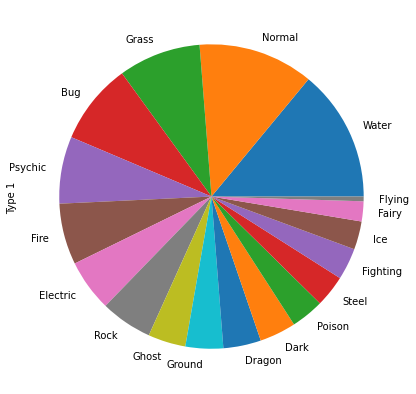

In [8]:
df["Type 1"].value_counts().plot(kind = "pie", figsize = (9, 7))

Columns  **Name, Type 1**, and **Type 2** are not required and are removed from the dataset as part of preprocessing step

In [9]:
df = df.drop(["Name", "Type 1", "Type 2"], axis = 1)

In [10]:
# The final dataset used for ML algorithms looks like this
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,
1,318,45,49,49,65,65,45,1,0
2,405,60,62,63,80,80,60,1,0
3,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,0
4,309,39,52,43,60,50,65,1,0


## 2. How correlated are each pokemon features?

<AxesSubplot:>

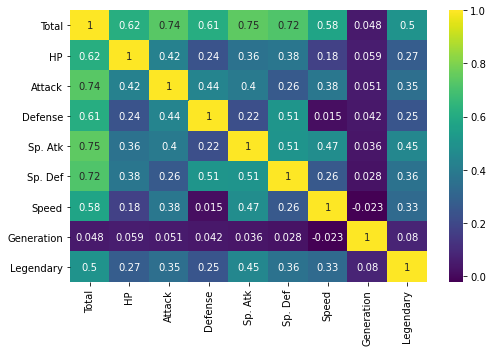

In [11]:
corr= df.corr()
plt.figure(figsize = (8, 5))
sns.heatmap(corr, annot = True, cmap = "viridis")

In [12]:
df.shape

(800, 9)

In [13]:
X = df.drop("Legendary", axis = 1)
y = df.Legendary

In [14]:
from imblearn.over_sampling import SMOTE

# defining the Model
smote = SMOTE(random_state = 0)

# Training the Model
smote.fit(X, y)

# Making the Samples
X_resampled3, y_resampled3 = smote.fit_resample(X,y)

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Legendary', ylabel='count'>

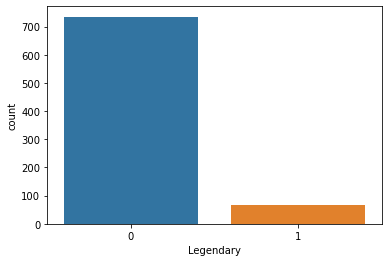

In [15]:
sns.countplot(y)

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Legendary', ylabel='count'>

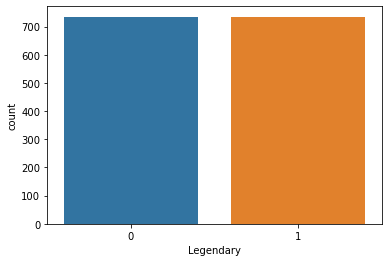

In [16]:
sns.countplot(y_resampled3)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid  = train_test_split(X_resampled3, y_resampled3,
                                                       test_size = 0.2,
                                                       random_state = 30)

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
y_valid.value_counts()

1    156
0    138
Name: Legendary, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [37]:
X_train.shape

(1176, 8)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
sns.set_style("whitegrid")

model = Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(keras.layers.BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [22]:
history = model.fit(X_train,y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
37/37 [==============================] - 0s 13ms/step - loss: 0.8912 - accuracy: 0.4940 - val_loss: 0.5584 - val_accuracy: 0.8129
Epoch 2/30
37/37 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8333 - val_loss: 0.3962 - val_accuracy: 0.8980
Epoch 3/30
37/37 [==============================] - 0s 3ms/step - loss: 0.2903 - accuracy: 0.8997 - val_loss: 0.3140 - val_accuracy: 0.9388
Epoch 4/30
37/37 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9175 - val_loss: 0.2591 - val_accuracy: 0.9524
Epoch 5/30
37/37 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.9430 - val_loss: 0.2215 - val_accuracy: 0.9592
Epoch 6/30
37/37 [==============================] - 0s 3ms/step - loss: 0.1996 - accuracy: 0.9464 - val_loss: 0.1947 - val_accuracy: 0.9592
Epoch 7/30
37/37 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9473 - val_loss: 0.1747 - val_accuracy: 0.9694
Epoch 8/30
37/37 [=

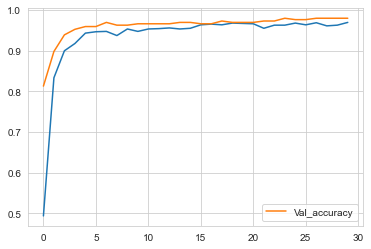

In [23]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"], label="Val_accuracy")
plt.legend()

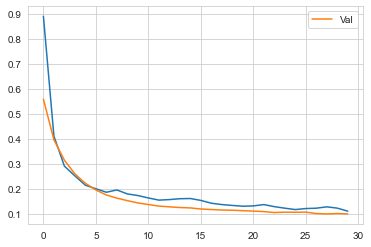

In [24]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"], label = "Val")
plt.legend()

In [25]:
model.evaluate(X_valid, y_valid)

10/10 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9796


[0.0987546443939209, 0.9795918464660645]

In [58]:
new_X = np.array([-0.7199888 , -0.41038311, -0.05035507, -1.17378579, -0.0171392 ,
        -1.18559699, -0.56710204,  0.40813062])
pred =model.predict(new_X.reshape(1, 8))
pred.round(0)

array([[0.]], dtype=float32)

In [63]:
Y_pred_nn = model.predict(X_valid)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

Y_pred_nn

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,


[[134   4]
 [  2 154]]


<AxesSubplot:>

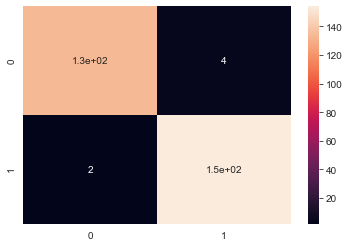

In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_valid, Y_pred_nn))
sns.heatmap(confusion_matrix(y_valid, Y_pred_nn), annot =True)
